In [1]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer

import gropt_dev as gropt

In [2]:
[safe_params, safe_params_cardiac] = gropt.readasc.asc_to_safe('F:/data/2025_0704_ascfiles/MP_GradSys_P034_X60.asc')
safe_params

{'tau1': array([0.0008, 0.0008, 0.0008]),
 'tau2': array([0.012, 0.012, 0.012]),
 'tau3': array([0.000212, 0.000194, 0.000184]),
 'a1': array([0.297, 0.213, 0.275]),
 'a2': array([0.5, 0.5, 0.5]),
 'a3': array([0.203, 0.287, 0.225]),
 'stim_limit': array([34.725, 23.202, 31.168]),
 'g_scale': array([0.3324, 0.3369, 0.3059])}

Final Good: False   Solve time: 3116.4 ms


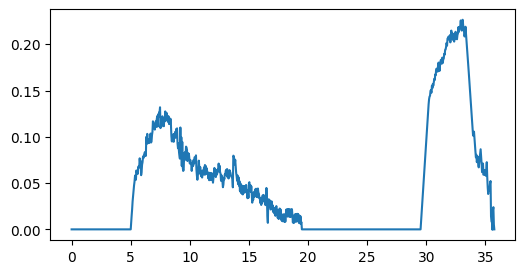

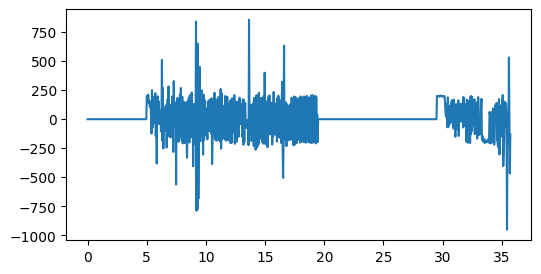

Max SAFE 0.966
Max SAFE Cardiac 1.380


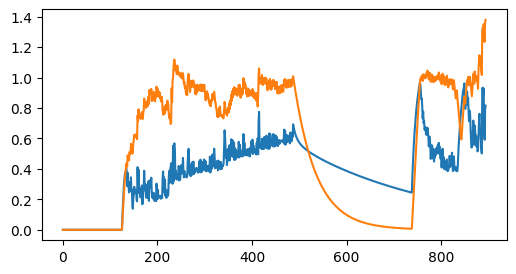

In [27]:
gropt.gropt_wrapper.set_verbose(0)

gparams = gropt.GroptParams()
gparams.diff_init(T_90 = 5e-3, T_180 = 10e-3,
                  dt=4e-5, 
                  TE = 49.0e-3,
                  T_readout = 13.2e-3)

# --- Set up constraints
gparams.add_gmax(.2)
gparams.add_smax(200)
gparams.add_moment(0,0.0)
#gparams.add_moment(1,0.0)
#gparams.add_moment(2,0.0)
gparams.add_bvalue(1000,1)
gparams.add_SAFE(1.2,safe_params=safe_params)
gparams.add_SAFE(1, safe_params=safe_params_cardiac)
gparams.add_TV(10, 1000)



start_t = timer()
gparams.init()
gparams.solve()
out = gparams.get_out()
stop_t = timer()

print(f'Final Good: {gparams.final_good>0}   Solve time: {1000*(stop_t-start_t):.1f} ms')




# Plotting
# ------------------------
plt.figure(figsize=(6,3))
tt_ms = np.arange(out.size)*gparams.dt*1e3
plt.plot(tt_ms, out)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(tt_ms[:-1], np.diff(out)/gparams.dt)
plt.show()

new_first_axis = 0
safe = gropt.gropt_wrapper.get_SAFE(out, gparams.dt, 
                                    new_first_axis=new_first_axis, 
                                    safe_params=safe_params)
safe_cardiac = gropt.gropt_wrapper.get_SAFE(out, gparams.dt, 
                                    new_first_axis=new_first_axis, 
                                    safe_params=safe_params_cardiac)
print(f'Max SAFE {np.max(safe):.3f}')
print(f'Max SAFE Cardiac {np.max(safe_cardiac):.3f}')
plt.figure(figsize=(6,3))
plt.plot(safe)
plt.plot(safe_cardiac)
plt.show()